<h3>More Dimensional Sequences - Stock Data</h3>

Let's return to the SPY data and try to predict the daily close price. Again, I will drop the adjusted close and volume.

Furthermore, the full dataset of 30 years is pretty big. I will just use data from 2010.

In [3]:
import pandas as pd
import numpy as np

In [4]:
spy = pd.read_csv('SPY.csv')
spy = spy.drop(['Adj Close', 'Volume'], axis=1)
spy['Date'] = pd.to_datetime(spy['Date'])
spy = spy[spy['Date'] >= '2010-01-01']
spy

,Date,Open,High,Low,Close
4264,2010-01-04,112.370003,113.389999,111.510002,113.330002
4265,2010-01-05,113.260002,113.680000,112.849998,113.629997
4266,2010-01-06,113.519997,113.989998,113.430000,113.709999
4267,2010-01-07,113.500000,114.330002,113.180000,114.190002
4268,2010-01-08,113.889999,114.620003,113.660004,114.570000
...,...,...,...,...,...
7326,2022-03-03,440.470001,441.109985,433.799988,435.709991
7327,2022-03-04,431.750000,433.369995,427.880005,432.170013
7328,2022-03-07,431.549988,432.299988,419.359985,419.429993
7329,2022-03-08,419.619995,427.209991,415.119995,416.250000


We redefine the two utility function to process the sequential data

In [5]:
def gen_hist_data(data,window,target,timecol=None):
    if timecol is None:
        lag_data = pd.concat([data.shift(t).add_suffix(f" (t-{t})") for t in range(window+1)], axis=1)
    else:
        time_data = data[timecol]
        lag_data = pd.concat([time_data]+[data.drop(timecol,axis=1).shift(t).add_suffix(f" (t-{t})") 
                                          for t in range(window+1)], axis=1)
    lag_data = pd.concat([lag_data, data[[target]].shift(-1).add_suffix(" (next)")], axis=1)
    return lag_data.iloc[window:-1,:]

def split_seq_data(data,split,target,timecol=None):
    if timecol is None:
        trainX = data.drop(target, axis=1).loc[:split,:]
        testX = data.drop(target, axis=1).loc[split:,:]
        trainY = data[target][:split]
        testY = data[target][split:]
    else:
        trainX = data.drop([target,timecol], axis=1).loc[data[timecol] < split, :]
        testX = data.drop([target,timecol], axis=1).loc[data[timecol] >= split, :]
        trainY = data[target][data[timecol] < split]
        testY = data[target][data[timecol]>= split]
    return trainX, testX, trainY, testY

In [18]:
window = 10
spy10 = gen_hist_data(spy, window, 'Close','Date')
spy10

,Date,Open (t-0),High (t-0),Low (t-0),Close (t-0),Open (t-1),High (t-1),Low (t-1),Close (t-1),Open (t-2),...,Close (t-8),Open (t-9),High (t-9),Low (t-9),Close (t-9),Open (t-10),High (t-10),Low (t-10),Close (t-10),Close (next)
4274,2010-01-19,113.620003,115.129997,113.589996,115.059998,114.730003,114.839996,113.199997,113.639999,114.489998,...,113.709999,113.260002,113.680000,112.849998,113.629997,112.370003,113.389999,111.510002,113.330002,113.889999
4275,2010-01-20,114.279999,114.449997,112.980003,113.889999,113.620003,115.129997,113.589996,115.059998,114.730003,...,114.190002,113.519997,113.989998,113.430000,113.709999,113.260002,113.680000,112.849998,113.629997,111.699997
4276,2010-01-21,113.919998,114.269997,111.559998,111.699997,114.279999,114.449997,112.980003,113.889999,113.620003,...,114.570000,113.500000,114.330002,113.180000,114.190002,113.519997,113.989998,113.430000,113.709999,109.209999
4277,2010-01-22,111.199997,111.739998,109.089996,109.209999,113.919998,114.269997,111.559998,111.699997,114.279999,...,114.730003,113.889999,114.620003,113.660004,114.570000,113.500000,114.330002,113.180000,114.190002,109.769997
4278,2010-01-25,110.209999,110.410004,109.410004,109.769997,111.199997,111.739998,109.089996,109.209999,113.919998,...,113.660004,115.080002,115.129997,114.239998,114.730003,113.889999,114.620003,113.660004,114.570000,109.309998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7325,2022-03-02,432.369995,439.720001,431.570007,437.890015,435.040009,437.170013,427.109985,429.980011,432.029999,...,437.059998,443.929993,448.059998,441.940002,446.600006,443.730011,446.279999,443.179993,446.100006,435.709991
7326,2022-03-03,440.470001,441.109985,433.799988,435.709991,432.369995,439.720001,431.570007,437.890015,435.040009,...,434.230011,443.220001,446.570007,436.420013,437.059998,443.929993,448.059998,441.940002,446.600006,432.170013
7327,2022-03-04,431.750000,433.369995,427.880005,432.170013,440.470001,441.109985,433.799988,435.709991,432.369995,...,429.570007,437.329987,438.660004,431.820007,434.230011,443.220001,446.570007,436.420013,437.059998,419.429993
7328,2022-03-07,431.549988,432.299988,419.359985,419.429993,431.750000,433.369995,427.880005,432.170013,440.470001,...,421.950012,431.890015,435.500000,425.859985,429.570007,437.329987,438.660004,431.820007,434.230011,416.250000


Now split the data. I will use data from 2021 for testing, and before that for training

In [7]:
trainX, testX, trainY, testY = split_seq_data(spy10, '2021-01-01', 'Close (next)', 'Date')

<h3> Modeling </h3>

With the data defined, we can apply regression models like SVR, trees, forests, etc., just like before

<h4>Support Vector Regressor</h4>

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR()

param_grid = [{
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf'],
    'gamma' : [0.01, 0.1, 1, 10, 100]
}]

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='r2')

The finetuned model (note that score is now R2 since we are doing regression):

In [9]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-25.442466841320883


And the testing performance 

In [10]:
best_svr = grid_search.best_estimator_
best_svr.score(testX, testY)

-65.12180981316536

<h4>Decision Tree Regressor</h4>

In [11]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

param_grid = [{
    'max_depth': [3,4,5,6],
    'max_features' : [4],
    'min_samples_split' : [2, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 10, 20, 30, 40]
}]

grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [3, 4, 5, 6], 'max_features': [4],
                          'min_samples_leaf': [1, 10, 20, 30, 40],
                          'min_samples_split': [2, 10, 20, 30, 40]}],
             return_train_score=True, scoring='r2')

In [12]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.1031421387296529


In [13]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

-4.542055249564381

<h4>Random Forest Regressor</h4>

In [14]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

param_grid = [{
    'n_estimators' : [5, 10, 20, 50],
    'max_depth': [3,4,5],
    'max_features' : [4],
    'min_samples_split' : [2, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 10, 20, 30, 40]
}]

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [3, 4, 5], 'max_features': [4],
                          'min_samples_leaf': [1, 10, 20, 30, 40],
                          'min_samples_split': [2, 10, 20, 30, 40],
                          'n_estimators': [5, 10, 20, 50]}],
             return_train_score=True, scoring='r2')

In [15]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 10, 'min_samples_split': 40, 'n_estimators': 10}
0.09663286317349935


In [16]:
best_rf = grid_search.best_estimator_
best_rf.score(testX, testY)

-5.81642439828853

<h4>Neural Network Regressor</h4>

In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

n_features = window

param_grid = [{
    'hidden_layer_sizes' : [[n_features,n_features],                       #two hidden layer with n_features neurons
                            [n_features,n_features,n_features],            #three hidden layer with n_features neurons 
                            [n_features//2,n_features//2],                 #two hidden layer with n_features/2 neurons
                            [n_features//2,n_features//2,n_features//2],   #three hidden layer with n_features/2 neurons
                            [n_features*2,n_features*2],                   #two hidden layer with n_features*2 neurons
                            [n_features*2,n_features*2,n_features*2]],     #three hidden layer with n_features*2 neurons
    'alpha' : [0.001, 0.01, 0.1, 1, 10]                                    #regularization terms
}]

mlp = MLPRegressor(max_iter=2000)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=2000),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10],
                          'hidden_layer_sizes': [[10, 10], [10, 10, 10], [5, 5],
                                                 [5, 5, 5], [20, 20],
                                                 [20, 20, 20]]}],
             return_train_score=True, scoring='r2')

Best training model:

In [20]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.001, 'hidden_layer_sizes': [10, 10]}
0.9575451918785319


In [21]:
best_nn = grid_search.best_estimator_
best_nn.score(testX, testY)

0.9627193234346988

In this case, R2 is actually not too good to evaluate. We will use root MSE

In [25]:
testY_pred = best_dt.predict(testX)

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(testY, testY_pred))

5.366956134199154

We can also plot the prediction against the true value

<IPython.core.display.Javascript object>


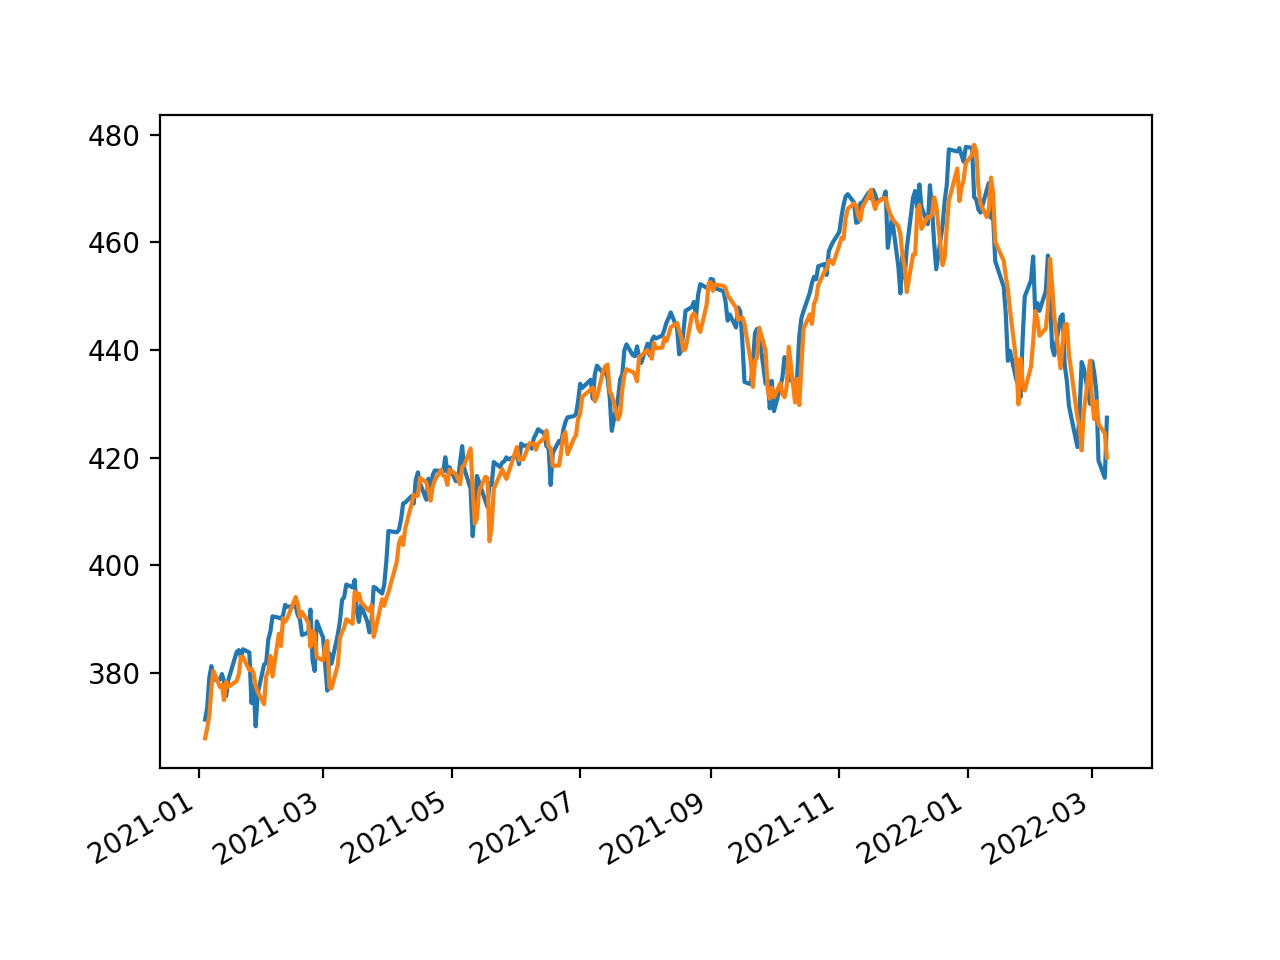

In [32]:
%matplotlib notebook

import matplotlib.pyplot as plt

date = spy.loc[spy['Date']>='2021-01-01','Date']
date = date[:-1]
plt.plot(date, testY)
plt.plot(date, testY_pred)
plt.gcf().autofmt_xdate()
plt.show()

<h3> Recurrent Neural Network </h3>

Similarly, we retransform the data to carry a longer lag. I will use 60. The training features also need to be reshaped for the RNN models.

In [59]:
window = 15

spy60 = gen_hist_data(spy, window, 'Close', 'Date')

trainX,testX,trainY,testY = split_seq_data(spy60,'2021-01-01','Close (next)','Date')
trainX = trainX.values.reshape(trainX.shape[0],window+1,-1)
testX = testX.values.reshape(testX.shape[0],window+1,-1)

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [70]:
model = keras.Sequential()

model.add(layers.Input([trainX.shape[1],trainX.shape[2]]))
model.add(layers.GRU(15, return_sequences=True))
model.add(layers.GRU(15, return_sequences=True))
model.add(layers.GRU(15))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse'])

model.fit(trainX, trainY, epochs=500, batch_size=64, validation_split=0.2)

Epoch 1/500
34/34 [==============================] - 3s 37ms/step - loss: 36783.2070 - mse: 36783.2070 - val_loss: 90112.4531 - val_mse: 90112.4531
Epoch 2/500
34/34 [==============================] - 1s 17ms/step - loss: 35225.2461 - mse: 35225.2461 - val_loss: 87999.0625 - val_mse: 87999.0625
Epoch 3/500
34/34 [==============================] - 1s 18ms/step - loss: 34006.8828 - mse: 34006.8828 - val_loss: 85991.3203 - val_mse: 85991.3203
Epoch 4/500
34/34 [==============================] - 1s 18ms/step - loss: 32805.2383 - mse: 32805.2383 - val_loss: 84010.3516 - val_mse: 84010.3516
Epoch 5/500
34/34 [==============================] - 1s 18ms/step - loss: 31615.8535 - mse: 31615.8535 - val_loss: 81988.5000 - val_mse: 81988.5000
Epoch 6/500
34/34 [==============================] - 1s 18ms/step - loss: 30385.3398 - mse: 30385.3398 - val_loss: 79841.2969 - val_mse: 79841.2969
Epoch 7/500
34/34 [==============================] - 1s 18ms/step - loss: 29093.9395 - mse: 29093.9395 - val_los

Epoch 112/500
34/34 [==============================] - 1s 18ms/step - loss: 2544.4570 - mse: 2544.4570 - val_loss: 14674.6016 - val_mse: 14674.6016
Epoch 113/500
34/34 [==============================] - 1s 19ms/step - loss: 2546.8081 - mse: 2546.8081 - val_loss: 14525.5166 - val_mse: 14525.5156
Epoch 114/500
34/34 [==============================] - 1s 18ms/step - loss: 2546.1348 - mse: 2546.1348 - val_loss: 14473.6855 - val_mse: 14473.6855
Epoch 115/500
34/34 [==============================] - 1s 19ms/step - loss: 2545.7566 - mse: 2545.7566 - val_loss: 14369.6133 - val_mse: 14369.6133
Epoch 116/500
34/34 [==============================] - 1s 19ms/step - loss: 2545.1528 - mse: 2545.1528 - val_loss: 14402.8516 - val_mse: 14402.8516
Epoch 117/500
34/34 [==============================] - 1s 19ms/step - loss: 2545.6804 - mse: 2545.6804 - val_loss: 14387.4844 - val_mse: 14387.4844
Epoch 118/500
34/34 [==============================] - 1s 18ms/step - loss: 2545.4233 - mse: 2545.4233 - val_los

34/34 [==============================] - 1s 18ms/step - loss: 2545.0461 - mse: 2545.0461 - val_loss: 14342.7549 - val_mse: 14342.7549
Epoch 223/500
34/34 [==============================] - 1s 17ms/step - loss: 2545.5505 - mse: 2545.5505 - val_loss: 14465.1328 - val_mse: 14465.1328
Epoch 224/500
34/34 [==============================] - 1s 17ms/step - loss: 2545.4365 - mse: 2545.4365 - val_loss: 14274.1387 - val_mse: 14274.1387
Epoch 225/500
34/34 [==============================] - 1s 18ms/step - loss: 2545.1436 - mse: 2545.1436 - val_loss: 14470.0332 - val_mse: 14470.0332
Epoch 226/500
34/34 [==============================] - 1s 19ms/step - loss: 2545.5254 - mse: 2545.5254 - val_loss: 14446.3604 - val_mse: 14446.3613
Epoch 227/500
34/34 [==============================] - 1s 17ms/step - loss: 2545.8401 - mse: 2545.8401 - val_loss: 14455.2178 - val_mse: 14455.2178
Epoch 228/500
34/34 [==============================] - 1s 18ms/step - loss: 2544.0793 - mse: 2544.0793 - val_loss: 14594.3164 

34/34 [==============================] - 1s 17ms/step - loss: 2545.8887 - mse: 2545.8887 - val_loss: 14289.1182 - val_mse: 14289.1182
Epoch 333/500
34/34 [==============================] - 1s 18ms/step - loss: 2545.5481 - mse: 2545.5481 - val_loss: 14481.8438 - val_mse: 14481.8438
Epoch 334/500
34/34 [==============================] - 1s 19ms/step - loss: 2545.5393 - mse: 2545.5393 - val_loss: 14553.0215 - val_mse: 14553.0215
Epoch 335/500
34/34 [==============================] - 1s 18ms/step - loss: 2544.8442 - mse: 2544.8442 - val_loss: 14694.0107 - val_mse: 14694.0107
Epoch 336/500
34/34 [==============================] - 1s 17ms/step - loss: 2546.4199 - mse: 2546.4199 - val_loss: 14571.0498 - val_mse: 14571.0498
Epoch 337/500
34/34 [==============================] - 1s 19ms/step - loss: 2545.4290 - mse: 2545.4290 - val_loss: 14443.9717 - val_mse: 14443.9717
Epoch 338/500
34/34 [==============================] - 1s 18ms/step - loss: 2544.6133 - mse: 2544.6133 - val_loss: 14301.8408 

34/34 [==============================] - 1s 18ms/step - loss: 2545.2646 - mse: 2545.2646 - val_loss: 14499.0068 - val_mse: 14499.0068
Epoch 443/500
34/34 [==============================] - 1s 18ms/step - loss: 2545.3464 - mse: 2545.3464 - val_loss: 14363.6230 - val_mse: 14363.6230
Epoch 444/500
34/34 [==============================] - 1s 18ms/step - loss: 2545.3958 - mse: 2545.3958 - val_loss: 14434.8086 - val_mse: 14434.8086
Epoch 445/500
34/34 [==============================] - 1s 18ms/step - loss: 2545.5518 - mse: 2545.5518 - val_loss: 14360.7930 - val_mse: 14360.7930
Epoch 446/500
34/34 [==============================] - 1s 18ms/step - loss: 2545.3542 - mse: 2545.3542 - val_loss: 14329.8066 - val_mse: 14329.8066
Epoch 447/500
34/34 [==============================] - 1s 18ms/step - loss: 2544.9639 - mse: 2544.9639 - val_loss: 14293.9668 - val_mse: 14293.9668
Epoch 448/500
34/34 [==============================] - 1s 17ms/step - loss: 2545.5024 - mse: 2545.5024 - val_loss: 14358.8232 

In [71]:
model.evaluate(trainX,trainY)

84/84 [==============================] - 1s 9ms/step - loss: 4930.2314 - mse: 4930.2314


[4930.2314453125, 4930.2314453125]

In [72]:
model.evaluate(testX,testY)

10/10 [==============================] - 0s 6ms/step - loss: 59450.6445 - mse: 59450.6445


[59450.64453125, 59450.64453125]

In [73]:
testY_pred = model.predict(testX)

from sklearn.metrics import r2_score

r2_score(testY, testY_pred)

10/10 [==============================] - 0s 8ms/step


-75.945692476451